In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

In [2]:
#Create a set of random latitudes and longitude combinations
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-90,90,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Create a practice set of random latitiude and longitude combinations
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
#Use the tuple() function to display the latitude and longitude combination
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
#Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [6]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [7]:
#Use the tuple() function to dsplay the latitude and longitude combination
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[1], coordinate[1]).city_name,
         citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

georgetown ie
arraial do cabo br
mar del plata gl
laguna cv
ushuaia br
georgetown br
necochea gl
solomenskoye za
georgetown za
sovetskaya tr
idah za
tunceli za
sao joao da barra br
georgetown fo
sao joao da barra cv
ushuaia ar
laguna cv
mar del plata ca
mar del plata bb
ushuaia ca
ushuaia gl
tambovka mg
ushuaia gf
dikson kz
georgetown pt
sao joao da barra ar
dikson au
jalu za
rize tz
ushuaia pe
arraial do cabo cv
dikson id
arraial do cabo ar
dikson ru
sao joao da barra pt
medvedka uz
ushuaia ar
sovetskaya za
ushuaia cl
ozinki za
ushuaia ar
dikson id
yenotayevka ru
vila velha pt
tambovka mg
dikson ru
priyutovo sc
georgetown gb
ushuaia ar
georgetown ie
ushuaia ar
ushuaia ar
ushuaia co
ushuaia cl
georgetown ie
ushuaia cl
georgetown es
georgetown za
cotonou sj
urozhaynoye km
tambovka za
rocha ar
sao joao da barra br
mar del plata ar
mao ao
matay za
ust-kishert sc
komsomolskiy za
yar-sale re
takoradi sj
rocha br
chuy gf
arraial do cabo ar
ushuaia gl
vila velha gl
georgetown gb
ushuaia ar
ma

dikson cn
el faiyum cd
ust-kishert ir
muzhi mu
dikson re
dikson ru
diffa sj
georgetown br
ushuaia cl
makhinjauri tz
damietta za
arraial do cabo ar
mar del plata br
ardesen tz
aleksandrov gay so
starobaltachevo re
el faiyum eg
georgetown br
mar del plata gl
dikson mu
krasnogvardeyets so
dikson au
lafia de
abasha sa
mao za
takoradi za
warri za
ushuaia cu
georgetown mr
dikson mu
dikson au
ushuaia pe
ushuaia ar
ankpa ly
aksarka mu
yar-sale in
idah sj
warri za
ivdel re
ozinki mg
ushuaia ca
dikson in
rize mz
georgetown pt
gaziantep ke
warri sj
ushuaia ar
arraial do cabo br
belebey re
georgetown is
arraial do cabo cv
faya se
ushuaia us
dikson in
dikson cn
port said no
cidreira ar
faya ao
georgetown za
agbor za
georgetown sl
faya cg
mao na
ushuaia br
yar-sale mg
tabou ml
pelym mg
georgetown za
mar del plata gl
muzhi ru
ushuaia ar
ushuaia ec
salekhard ru
tunceli ru
cidreira cv
dikson ru
tala tr
dikson au
martvili tz
dikson in
ushuaia pe
dikson au
faya za
port said za
ushuaia cl
georgetown ml
di

In [8]:
#Create a list for holding the cities
cities = []
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

618

In [9]:
#URL things
#Import the API key
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | skibbereen
Processing Record 2 of Set 1 | touros
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | cuiaba
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | paamiut
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | hakkari
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 13 of Set 1 | vestmanna
Processing Record 14 of Set 1 | rio gallegos
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | bathsheba
Processing Record 17 of Set 1 | pangnirtung
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | marovoay
Processing Record 20 of Set 1 | grand-santi
Processing Record 21 of Set 1 | ushtobe
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 | busselton
Processing Record 

Processing Record 38 of Set 4 | araguaina
Processing Record 39 of Set 4 | la seyne-sur-mer
Processing Record 40 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 41 of Set 4 | vestmannaeyjar
Processing Record 42 of Set 4 | gat
Processing Record 43 of Set 4 | praia da vitoria
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | vagur
Processing Record 46 of Set 4 | am timan
Processing Record 47 of Set 4 | koslan
Processing Record 48 of Set 4 | mehamn
Processing Record 49 of Set 4 | minab
Processing Record 50 of Set 4 | harper
Processing Record 1 of Set 5 | esmeraldas
Processing Record 2 of Set 5 | tiquisio
Processing Record 3 of Set 5 | rochelle
Processing Record 4 of Set 5 | villazon
Processing Record 5 of Set 5 | svit
Processing Record 6 of Set 5 | zapolyarnyy
Processing Record 7 of Set 5 | blagoyevo
Processing Record 8 of Set 5 | morro agudo
Processing Record 9 of Set 5 | susehri
Processing Record 10 of Set 5 | bloemfontein
Processing Record 11 o

Processing Record 27 of Set 8 | tambul
City not found. Skipping...
Processing Record 28 of Set 8 | mabaruma
Processing Record 29 of Set 8 | klaksvik
Processing Record 30 of Set 8 | bahia de caraquez
Processing Record 31 of Set 8 | novomykolayivka
Processing Record 32 of Set 8 | qaqortoq
Processing Record 33 of Set 8 | kamalia
Processing Record 34 of Set 8 | manaure
Processing Record 35 of Set 8 | centenario do sul
Processing Record 36 of Set 8 | puerto leguizamo
Processing Record 37 of Set 8 | alipur duar
City not found. Skipping...
Processing Record 38 of Set 8 | massakory
Processing Record 39 of Set 8 | doha
Processing Record 40 of Set 8 | moose factory
Processing Record 41 of Set 8 | ibra
Processing Record 42 of Set 8 | tahta
Processing Record 43 of Set 8 | chake chake
Processing Record 44 of Set 8 | praia
Processing Record 45 of Set 8 | key largo
Processing Record 46 of Set 8 | posse
Processing Record 47 of Set 8 | purranque
Processing Record 48 of Set 8 | gao
Processing Record 49 

Processing Record 15 of Set 12 | kidal
Processing Record 16 of Set 12 | sahrak
City not found. Skipping...
Processing Record 17 of Set 12 | bolobo
Processing Record 18 of Set 12 | luwingu
Processing Record 19 of Set 12 | carnarvon
Processing Record 20 of Set 12 | nueve de julio
Processing Record 21 of Set 12 | chicama
Processing Record 22 of Set 12 | kemijarvi
Processing Record 23 of Set 12 | port blair
Processing Record 24 of Set 12 | bodden town
Processing Record 25 of Set 12 | severnoye
Processing Record 26 of Set 12 | novi pazar
Processing Record 27 of Set 12 | schenefeld
Processing Record 28 of Set 12 | hvide sande
Processing Record 29 of Set 12 | coquimbo
Processing Record 30 of Set 12 | valdez
Processing Record 31 of Set 12 | bolonchen
City not found. Skipping...
Processing Record 32 of Set 12 | aswan
Processing Record 33 of Set 12 | maralal
Processing Record 34 of Set 12 | hare bay
Processing Record 35 of Set 12 | bafia
Processing Record 36 of Set 12 | bentiu
Processing Record 

In [12]:
#Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Skibbereen,51.5500,-9.2667,66.00,89,69,14.47,IE,2021-09-09 18:27:51
1,Touros,-5.1989,-35.4608,85.10,59,13,16.58,BR,2021-09-09 18:27:51
2,Ilulissat,69.2167,-51.1000,35.62,69,75,11.50,GL,2021-09-09 18:27:52
3,Ponta Do Sol,32.6667,-17.1000,79.00,78,98,1.81,PT,2021-09-09 18:27:52
4,Cuiaba,-15.5961,-56.0967,93.20,34,30,7.83,BR,2021-09-09 18:27:16
...,...,...,...,...,...,...,...,...,...
560,Parrita,9.5201,-84.3225,92.97,72,100,6.31,CR,2021-09-09 18:30:25
561,Uray,60.1247,64.7758,49.19,92,100,10.33,RU,2021-09-09 18:30:25
562,Aquin,18.2833,-73.4000,86.41,64,22,8.32,HT,2021-09-09 18:30:26
563,Kanye,-24.9667,25.3327,63.41,45,0,9.35,BW,2021-09-09 18:30:26


In [13]:
#Reorder the columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Skibbereen,IE,2021-09-09 18:27:51,51.5500,-9.2667,66.00,89,69,14.47
1,Touros,BR,2021-09-09 18:27:51,-5.1989,-35.4608,85.10,59,13,16.58
2,Ilulissat,GL,2021-09-09 18:27:52,69.2167,-51.1000,35.62,69,75,11.50
3,Ponta Do Sol,PT,2021-09-09 18:27:52,32.6667,-17.1000,79.00,78,98,1.81
4,Cuiaba,BR,2021-09-09 18:27:16,-15.5961,-56.0967,93.20,34,30,7.83
...,...,...,...,...,...,...,...,...,...
560,Parrita,CR,2021-09-09 18:30:25,9.5201,-84.3225,92.97,72,100,6.31
561,Uray,RU,2021-09-09 18:30:25,60.1247,64.7758,49.19,92,100,10.33
562,Aquin,HT,2021-09-09 18:30:26,18.2833,-73.4000,86.41,64,22,8.32
563,Kanye,BW,2021-09-09 18:30:26,-24.9667,25.3327,63.41,45,0,9.35


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
#Import the time module
import time
#Get today's date in seconds
today = time.strftime("%x")
today

'09/09/21'

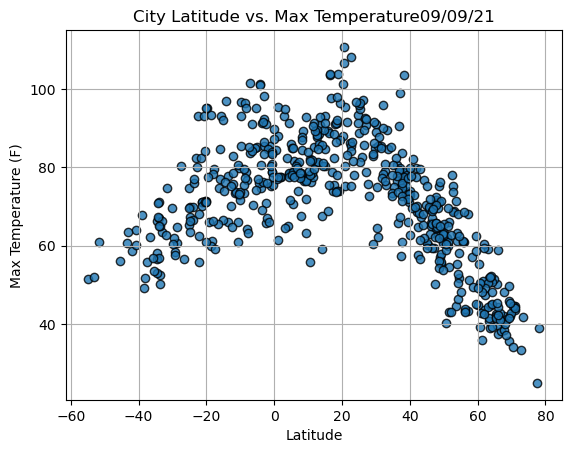

In [17]:
#Import time module
#import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

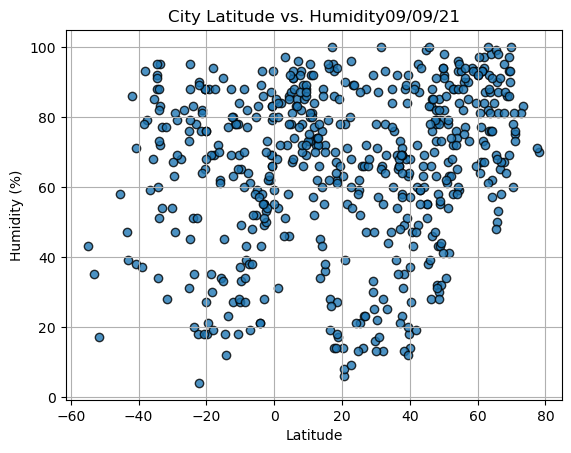

In [18]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("weather_data/Fig2.png")
#Show plot
plt.show()

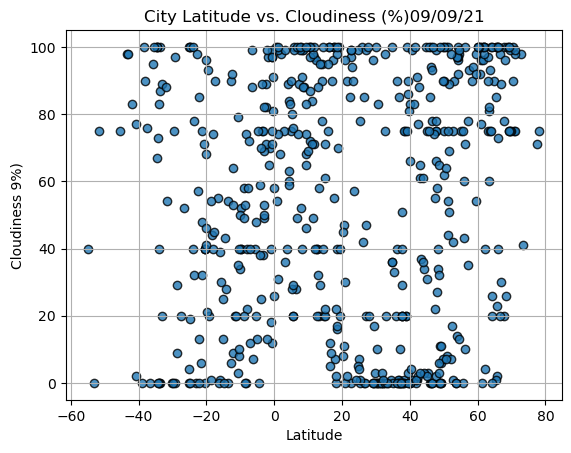

In [19]:
#Build the scatter plots for latitude vs cloudiness
plt.scatter(lats, cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#Incorporate the other graph properities
plt.title(f"City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness 9%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("weather_data/Fig3.png")
#Show the plot
plt.show()

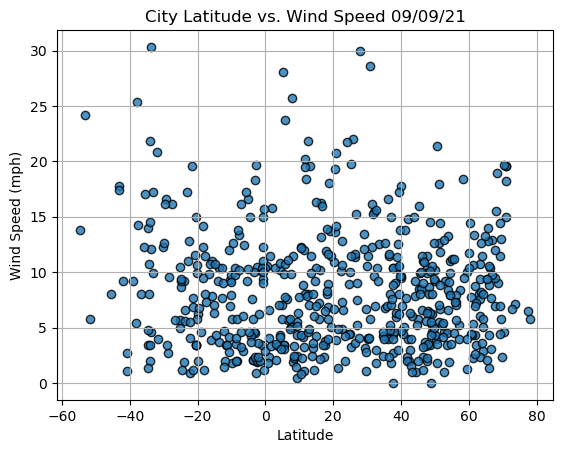

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                       Torbay
Country                        CA
Date          2021-09-09 18:27:55
Lat                       47.6666
Lng                      -52.7314
Max Temp                    71.76
Humidity                       73
Cloudiness                     75
Wind Speed                  10.36
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Skibbereen,IE,2021-09-09 18:27:51,51.5500,-9.2667,66.00,89,69,14.47
2,Ilulissat,GL,2021-09-09 18:27:52,69.2167,-51.1000,35.62,69,75,11.50
3,Ponta Do Sol,PT,2021-09-09 18:27:52,32.6667,-17.1000,79.00,78,98,1.81
6,Paamiut,GL,2021-09-09 18:27:52,61.9940,-49.6678,43.56,94,100,4.32
9,Hakkari,TR,2021-09-09 18:27:53,37.5833,44.1667,61.02,58,29,4.45


In [24]:
#Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

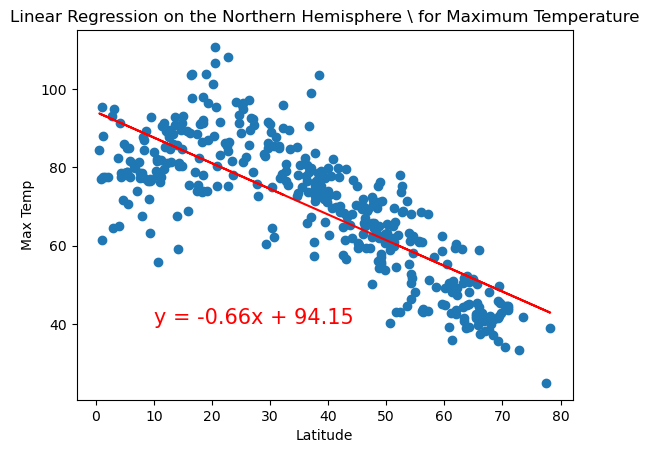

In [25]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \ for Maximum Temperature',
                      'Max Temp',(10,40))

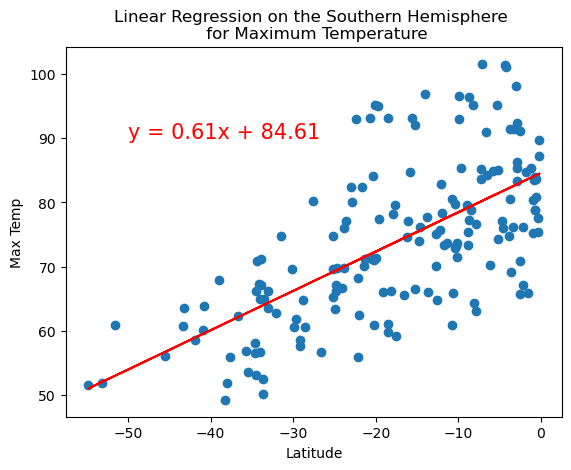

In [26]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50, 90))

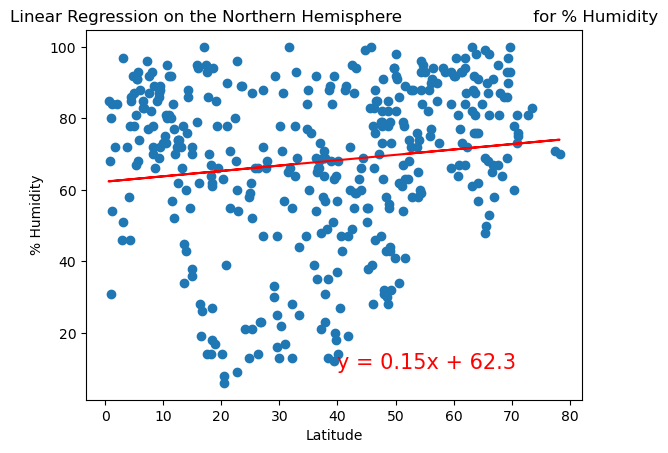

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

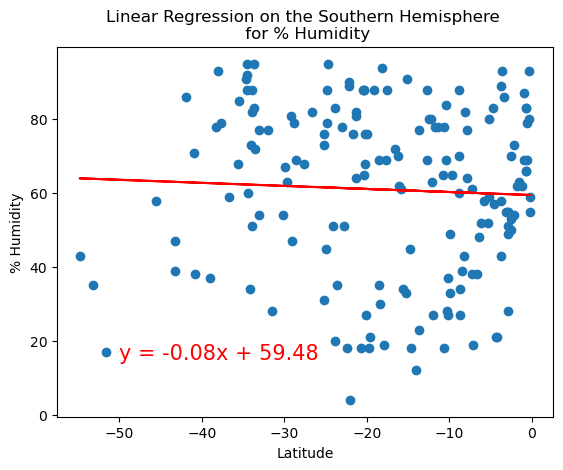

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

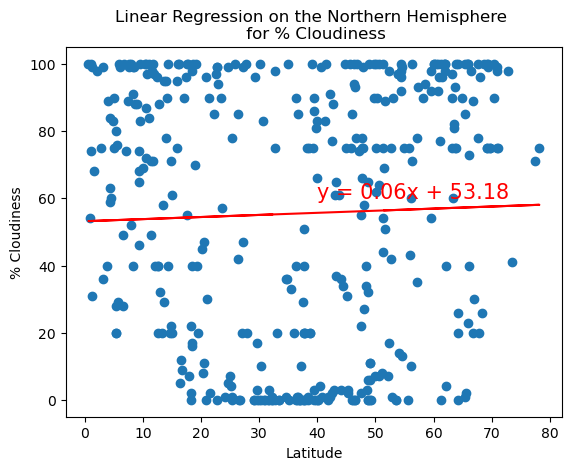

In [29]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(40,60))

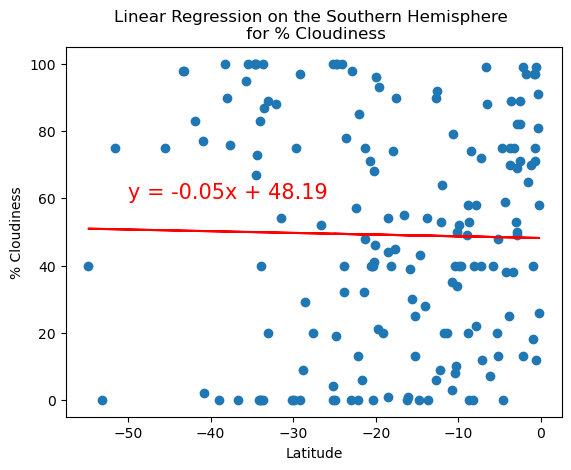

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',(-50,60))

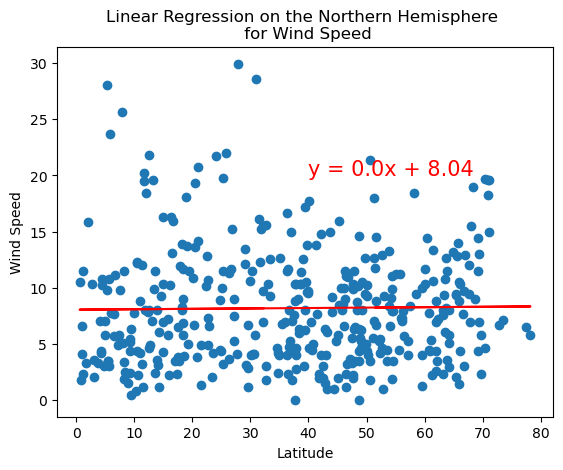

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',(40,20))

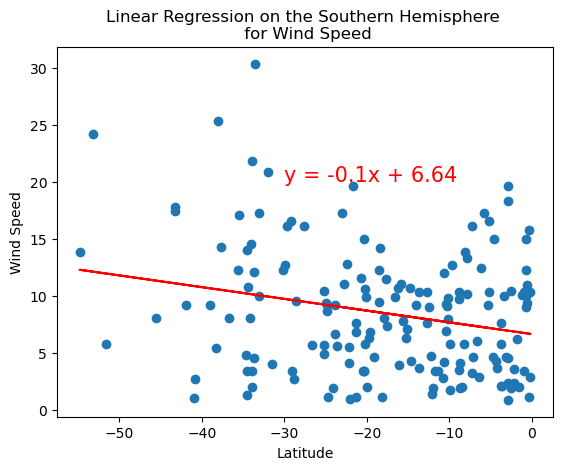

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',(-30,20))